In [1]:
library(xlsx)
# setwd("~/GitHub/datasci-strata-talk-missing-data")


In [2]:
##### load data ###############################################
raw_df <- read.xlsx("Yan 2 Glucose Data.xlsx", 
                    sheetName = "Sheet1",
                    startRow = 2)
head(raw_df)


ID,Time,Record.Type,Historic.Glucose..mmol.L.,Scan.Glucose..mmol.L.,Non.numeric.Rapid.Acting.Insulin,Rapid.Acting.Insulin..units.,Non.numeric.Food,Carbohydrates..grams.,Non.numeric.Long.Acting.Insulin,Long.Acting.Insulin..units.,Notes,Strip.Glucose..mmol.L.,Ketone..mmol.L.,Meal.Insulin..units.,Correction.Insulin..units.,User.Change.Insulin..units.,Previous.Time,Updated.Time
567,2019-07-31 10:54:59,0,6.8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
568,2019-07-31 11:10:00,0,6.8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
569,2019-07-31 11:35:59,1,NA,6.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
571,2019-07-31 11:26:00,0,6.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
572,2019-07-31 11:41:00,0,6.0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
573,2019-07-31 12:06:00,1,NA,5.7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


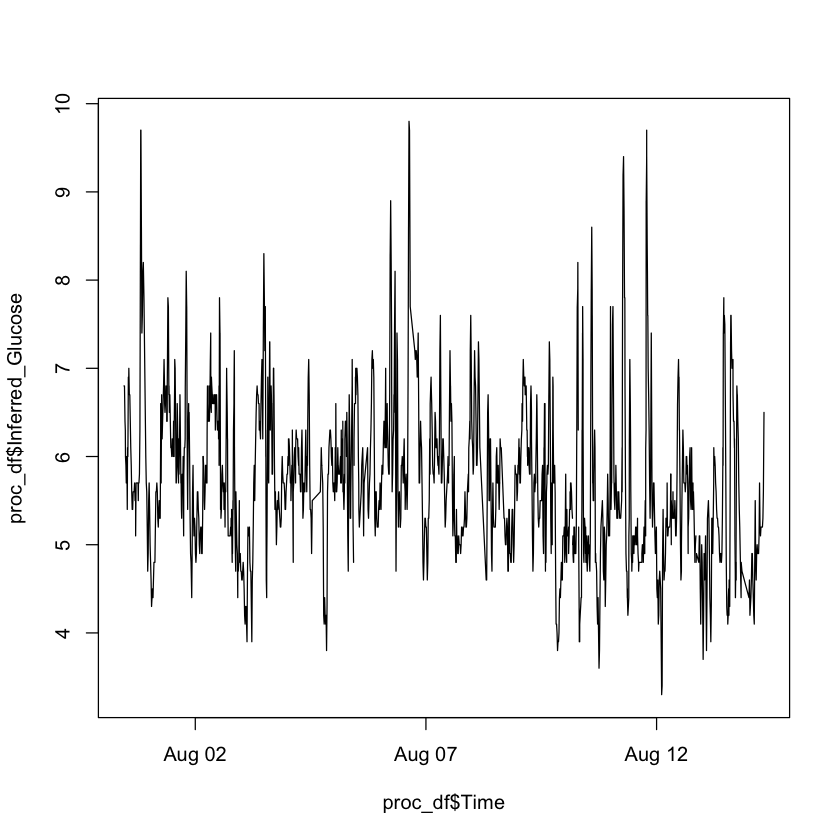

In [3]:
proc_df <- raw_df
proc_df <- proc_df[with(proc_df, order(proc_df$Time)), ] 
proc_df["Inferred_Glucose"] = rowMeans(proc_df[c('Historic.Glucose..mmol.L.', 'Scan.Glucose..mmol.L.')], na.rm = TRUE)

plot(proc_df$Time, proc_df$Inferred_Glucose, type = "l")


Warning message in check_tzones(e1, e2):
“'tzone' attributes are inconsistent”Warning message in check_tzones(e1, e2):
“'tzone' attributes are inconsistent”

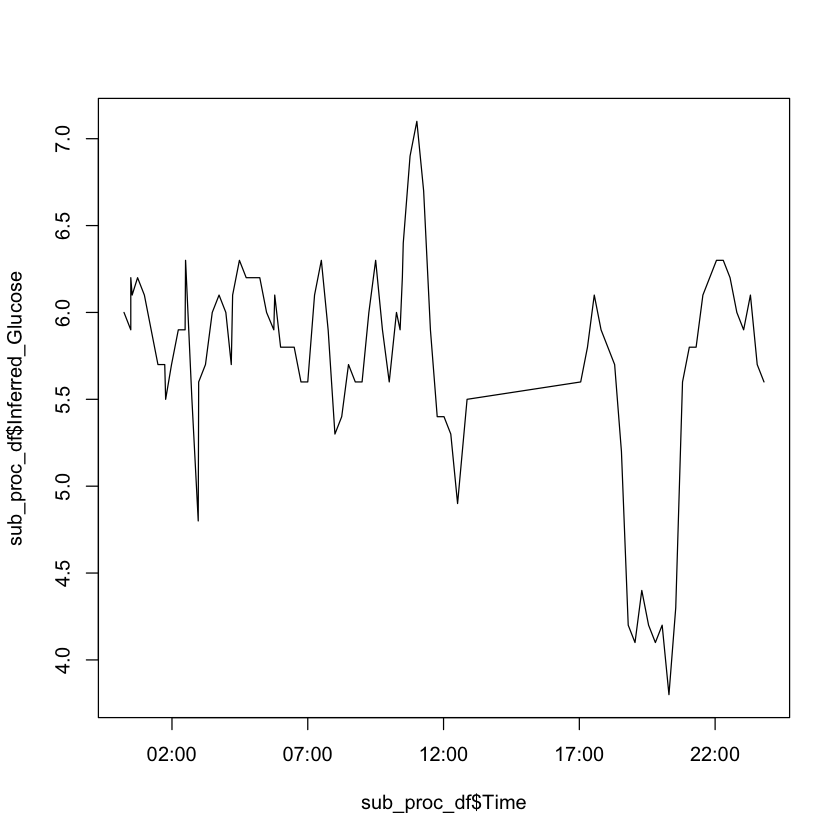

In [4]:
sub_proc_df <- subset(proc_df, Time >= as.POSIXct('2019-08-04 00:00:00', tz = 'UTC') & Time < as.POSIXct('2019-08-05 00:00:00', tz = 'UTC'))
plot(sub_proc_df$Time, sub_proc_df$Inferred_Glucose, type = "l")


In [5]:
df <- sub_proc_df[c("Time", "Inferred_Glucose")]
head(df)  


,Time,Inferred_Glucose
444,2019-08-04 00:14:00,6.0
445,2019-08-04 00:29:00,5.9
447,2019-08-04 00:29:00,6.2
446,2019-08-04 00:32:00,6.1
448,2019-08-04 00:43:59,6.2
449,2019-08-04 00:59:00,6.1


In [6]:
# add minute_of_day
t.str <- strptime(df$Time, "%Y-%m-%d %H:%M:%S")
m.str <- as.numeric(format(t.str, "%H"))*60 + as.numeric(format(t.str, "%M"))
df$Minute_of_Day <- m.str


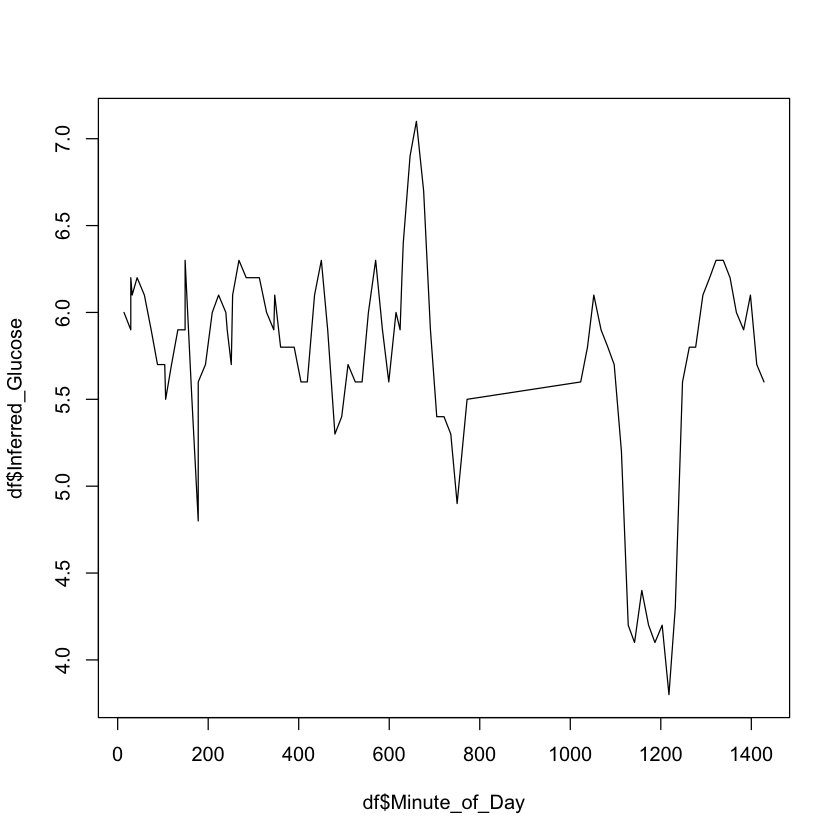

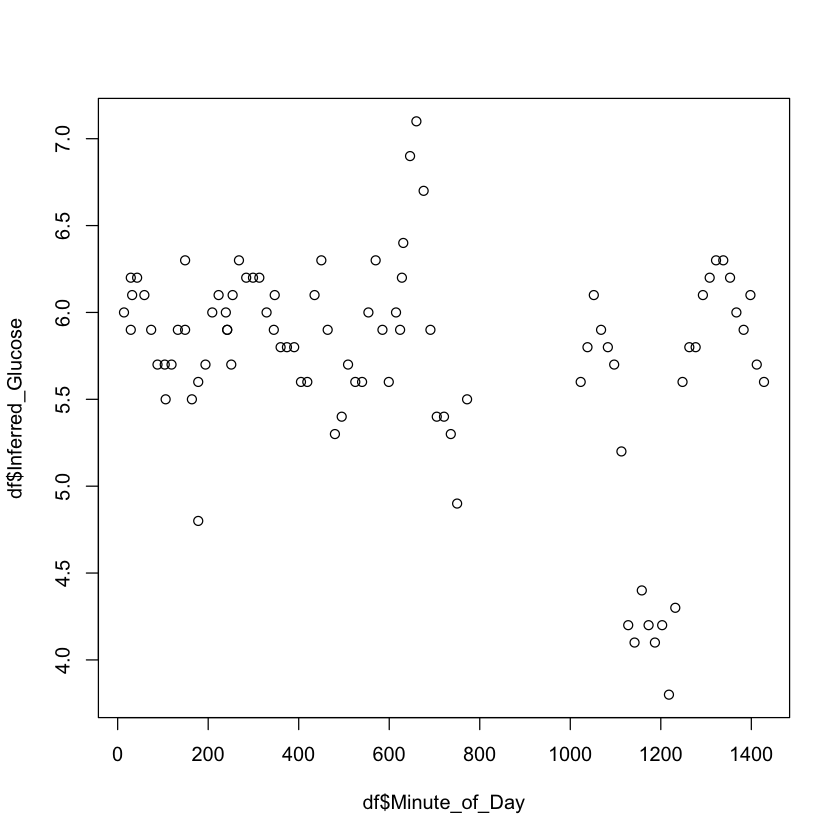

In [7]:
# sort by minute_of_day
df <- df[with(df, order(df$Minute_of_Day)), ]
plot(df$Minute_of_Day, df$Inferred_Glucose, type = "l")
plot(df$Minute_of_Day, df$Inferred_Glucose)


Minute_of_Day,Inferred_Glucose
14,6.00
29,6.05
32,6.10
43,6.20
59,6.10
74,5.90
88,5.70
104,5.70
106,5.50
119,5.70


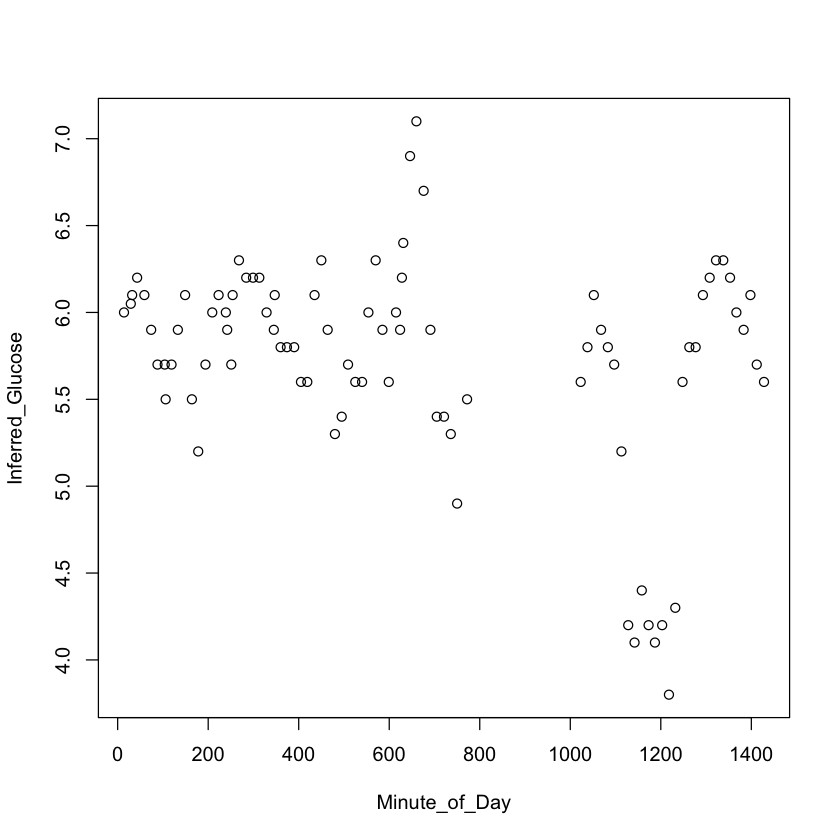

In [8]:
glucose_ser <- aggregate(df['Inferred_Glucose'], 
                         list(df$Minute_of_Day), 
                         mean)

colnames(glucose_ser) <- c('Minute_of_Day', 'Inferred_Glucose')
glucose_ser
plot(glucose_ser)

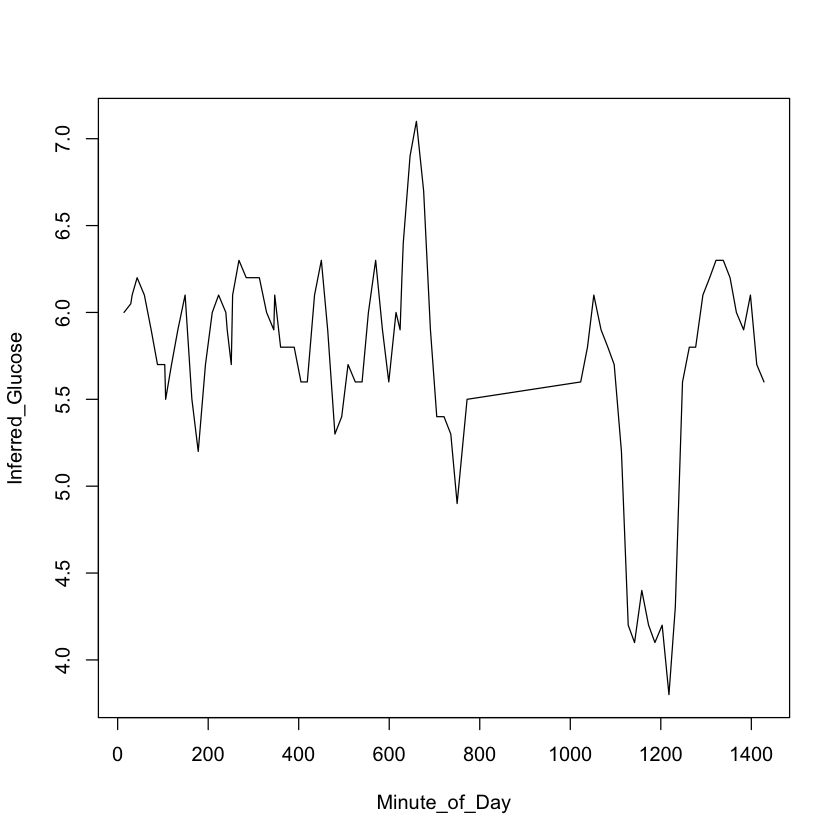

In [9]:
plot(glucose_ser, type = 'l')


In [ ]:
# save glucose series
write.xlsx(glucose_ser, "glucose_ser.xlsx")


# Handling the Gap

In [10]:
df <- glucose_ser
rownames(df) <- glucose_ser$Minute_of_Day

gap_sizes <- diff(as.matrix(df$Minute_of_Day))

GAP_LEFT_INDEX = 58
GAP_RIGHT_INDEX = 59
GAP_LEFT_MINUTES <- df$Minute_of_Day[GAP_LEFT_INDEX]
GAP_RIGHT_MINUTES <- df$Minute_of_Day[GAP_RIGHT_INDEX]

print(c(GAP_LEFT_INDEX, GAP_RIGHT_INDEX, GAP_LEFT_MINUTES, GAP_RIGHT_MINUTES))

[1]   58   59  772 1023


In [11]:
missing_indices = floor((GAP_RIGHT_MINUTES - GAP_LEFT_MINUTES)/15)
missing_minutes <- sapply(c(0:missing_indices), function(x) GAP_LEFT_MINUTES + x*15)
missing_minutes


[1]  772  787  802  817  832  847  862  877  892  907  922  937  952  967  982
[16]  997 1012

In [12]:
# add new minute of day
new_index_labels <- setdiff(missing_minutes, df$Minute_of_Day) 
new_df <- as.data.frame(matrix(nrow = length(new_index_labels), ncol = 2, dimnames = list(new_index_labels, colnames(df))))
new_df$Minute_of_Day <- rownames(new_df)


In [13]:
df <- rbind(df, new_df)
df$Minute_of_Day <- as.numeric(df$Minute_of_Day)

# sort by minute of day
df <- df[with(df, order(df$Minute_of_Day)), ]


In [ ]:
# save glucose series
write.xlsx(df, "glucose.xlsx")
